# Linear and affine transformations of images

In [3]:
%matplotlib inline
from skimage import data, io, draw
from skimage.io import imshow
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In these exercises you will learn about a class of image transformations that can be modelled as matrix-to-vector multiplication. The matrix represents the transformation (and, accordingly, is called a transformation matrix) while the vector is a coordinate: a point in space. You will use ordinary 2-dimensional coordinates and a particular type of 3-dimensional coordinates known as *homogenous coordinates*. 

Although homogenous coordinates are fascinating from a mathematical point of view, we approach them in a practical manner and show that they first and foremost a convenient way of allowing matrix-to-vector operations to express an extended set of transformations known as *affine transformations*.

Because pixels are discrete and live at integer coordinates (what color is the pixel at $(1.5, \pi)$?), the idea of transformations will be introduced in the context of continous coordinates (ordinary plotting). Transforming pixels is then the topic of the last section of this exercise. 

### Transformations with continous coordinates

Let's forget about jagged, dirty pixels for a moment and think about nice and pure and clean *shapes*. We will start with something as unearthly as *the unit square*, a box of even sides with the bottom left corner touching the origin, aligned along the $x$-axis and $y$-axis. 

Do you see it? Otherwise execute the cell below.

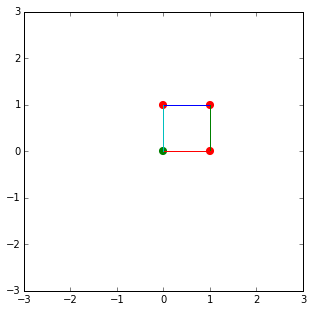

In [4]:
def draw_rectangle(list_of_corners, x_max=3, y_max=3, ax=None):
    """Draw a rectangle defined by four corners a, b, c, and d
    
     a --------- b
     |           |
     |           |
     |           |
     d --------- c
    """
    a, b, c, d = list_of_corners
    
    if not ax:
        fig, ax = plt.subplots()
        fig.set_size_inches(5, 5)

    # Connect corners by straight, blue lines
    lines = [(a, b), (b, c), (c, d), (d, a)]
    for p1, p2 in lines:
        ax.plot([p1[0], p2[0]], [p1[1], p2[1]], c='b')
        
    # Plot the last point as a green point and the rest as red
    ax.scatter(*list_of_corners[-1:].T, color='g', s=50)
    ax.scatter(*list_of_corners[:-1].T, color='r', s=50)

    ax.axis('equal')
    ax.set_xlim(-x_max, x_max)
    ax.set_ylim(-y_max, y_max)

square_at_origin = np.array([(0, 1), (1, 1), (1, 0), (0, 0)])
square_at_1_1 = np.array([(1, 2), (2, 2), (2, 1), (1, 1)])
draw_rectangle(square_at_origin)

The square is defined by the coordinates of its corners, and we can move it around or turn it into other shapes by transforming these coordinates.

Some tranformations are as simple as multiplying or adding scalars (single numbers) to the coordinates. (Recall that when you add a scalar to a `numpy` array, it is added to each element of the array. The same goes for scalar-to-array multiplication: each element in the array is multiplied by the scalar).

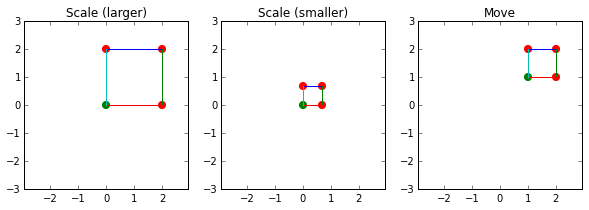

In [5]:
fig, axes = plt.subplots(ncols=3)
fig.set_size_inches(10, 3)

axes[0].set_title("Scale (larger)")
draw_rectangle(square_at_origin * 2, ax=axes[0])

axes[1].set_title("Scale (smaller)")
draw_rectangle(square_at_origin * 0.7, ax=axes[1])

axes[2].set_title("Move")
draw_rectangle(square_at_origin + 1, ax=axes[2])

However, the operations above are only a small subset of the operations that you can perform with a $2 \times 2$ transformation matrix. As shown in the equation below, the matrix "acts on" a set of input coordinates to produce output coordinates. This procedure is also known as a *linear map* or *linear transformation*.

$$\begin{bmatrix}
x'\\
y' 
\end{bmatrix} = 
\begin{bmatrix} 
a & b \\
c & d 
\end{bmatrix}
\begin{bmatrix} 
x\\
y
\end{bmatrix}$$

To see what happens we make the matrix multiplication explicit:

$$\begin{bmatrix}
ax + by \\
cx + dy 
\end{bmatrix} = 
\begin{bmatrix} 
a & b \\
c & d 
\end{bmatrix}
\begin{bmatrix} 
x\\
y
\end{bmatrix}$$

Note $x' = ax + by$ and $y' = cx + dy$ are both linear combination of $x$ and $y$.

#### General notation

The equations above may be written more compactly as matrix-to-vector operations. 

First let us define the transformation matrix
$
\mathbf{A} = \begin{bmatrix} 
a & b \\
c & d 
\end{bmatrix},
$
input vector $\mathbf{x} = \begin{bmatrix} x\\y\end{bmatrix}$, and output vector $\mathbf{y} = \begin{bmatrix} x'\\y'\end{bmatrix}$. 

Then the transformation becomes

$$\mathbf{y} = \mathbf{Ax}$$

#### Transformations in `numpy`

The simplest, and possibly least exciting, transformation you can make is the identify transformation, which takes a point to itself. In the cell below we define the identity matrix `A_ident` and perform a linear map of a single coordinate. 

Please take note of the fact that  matrix multiplication is `.dot` in `numpy`.

In [8]:
A_ident = np.array([[1, 0], [0, 1]])
print("Before transformation", square_at_origin[0])
print("After tranformation  ", A_ident.dot(square_at_origin[0]))

Before transformation [0 1]
After tranformation   [0 1]


Now it is your task to come up with transformation matrices to express the operations below. After you specify the matrix, you should plot the tranformed shape using `draw_rectangle`.

**Exercise** Double the width of the square but keep the height constant. 

In [ ]:
# Your code here

**Exercise** Reflect the square around the $x$-axis.

In [ ]:
# Your code here

**Exercise** Scale the upper and lower *x* coordinates *unevenly*. This results in a characteristic trapezoid shape and is called shearing.

In [ ]:
# Your code here

#### Rotation

The Wikipedia page on [linear mappings](http://en.wikipedia.org/wiki/Linear_map) lists many interesting and useful transformation matrices. For instance, you can find this matrix for rotation around the origin by the angle $\theta$:

$$\mathbf{A}=\begin{bmatrix}\cos\theta & -\sin\theta \\ \sin\theta & \cos\theta \end{bmatrix}$$

**Exercise** Write down the rotation matrix for a 45-degree rotation and test it on the square. See if you can explain what is going on.

Note: The rotation $\theta$ should be specified in radians. When you perform the conversion between degrees and radians the constant `np.pi` might come in handy. There are decidated sin and cos functions in the `numpy` module.

In [ ]:
# Your code here

## Affine transformations

So far we have only considered transformation matrices of the form

$$
\mathbf{A} = \begin{bmatrix} 
a & b \\
c & d 
\end{bmatrix},
$$

We may use these $2 \times 2$ matrices to scale, reflect, rotate, and shear. Yet the operations are limited in the sense that they happen with respect to the origin . For instance, you can rotate a figure around the origin, but you cannot rotate it around any given point. In general, $2 \times 2$ transformation matrices cannot move (translate) figures to arbitrary points. 

The class of *affine* transformations allow us to do just that. An affine transformation may be expressed as

$$\mathbf{y} = \mathbf{Ax} + \mathbf{b},$$

where $\mathbf{b} = \begin{bmatrix} t_x \\t_y \end{bmatrix}$ is a vector that moves the result of the linear transformation $\mathbf{Ax}$ by $t_x$ in direction of the $x$-axis and $t_y$ on the $y$-axis. Writing it out, 

$$\begin{bmatrix}
ax + by + t_x\\
cx + dy + t_y
\end{bmatrix} = 
\begin{bmatrix} 
a & b \\
c & d 
\end{bmatrix}
\begin{bmatrix} x\\y \end{bmatrix}
+
\begin{bmatrix} t_x\\t_y \end{bmatrix}
$$

### Homogeneous coordinates  

Affine transformations are often expressed in a form that does not explicitly use a translation vector $\mathbf{b}$. This is also the case in scikit-images, which is good reason for you to know about it, even if it requires that you look at a few more equations. 

To do away with the translation vector, we need a larger $3 \times 3$ translation matrix as well as a 3-dimensional representation of our 2-dimensional point. 

$$\mathbf{x} = \begin{bmatrix} x\\y\\1 \end{bmatrix}$$

The 3-dimensional representation is called *homogeneous coordinates*. In the context of affine transformations the last dimension will always have a fixed value of 1. The $3 \times 3$ translation matrices are of the form below. The last row of the matrix is also fixed.

$$\mathbf{A} = \begin{bmatrix} 
a & b & t_x\\
c & d & t_y\\
0 & 0 & 1\\
\end{bmatrix}$$

Putting these two things together:

$$\begin{bmatrix}
ax + by + t_x\\
cx + dy + t_y\\
1
\end{bmatrix} = 
\begin{bmatrix} 
a & b & t_x\\
c & d & t_y\\
0 & 0 & 1\\
\end{bmatrix}
\begin{bmatrix} x\\y\\1 \end{bmatrix}
$$

Observe that the $3 \times 3$ affine transformation matrix gives exactly the same result (in the first two dimensions) as the $2 \times 2$ linear transformation matrix followed by translation. 

#### Affine exercise

**Exercise** With a single transformation matrix, double the width of the unit square and move it two units to the left. 

In [ ]:
# Your code here

### Transformations in images

Above you learned how to apply transformation matrices to coordinates and used that to manipulate a unit square. Most of the operations you explored are commonly used with images. For instance, enlarging or shrinking an image by scaling, and rotating an image to arrange it on a page.

However, things become more complicated when we move from world of continous coordinates to the discrete units of pixels. As a motivating example, consider the following translation matrix, which scales by a factor of 1.5:

$$
\mathbf{A} = \begin{bmatrix} 
1.5 & 0 \\
0 & 1.5 
\end{bmatrix}
$$

We now want to apply this transformation to a pixel image defined by a `numpy` array. 

However, the tranformation $\mathbf{A}\begin{bmatrix} 1\\ 1 \end{bmatrix}$ results in coordinates $\begin{bmatrix} 1.5\\ 1.5 \end{bmatrix}$, which "falls between" pixels. Thus it is not apparent where in a destination image to transfer the contents of pixel $(1, 1)$ in the source image

#### Looking at the transformation from the other side

In practice it may be more convenient to look at process from the perspective of the destination image $d$ rather than the source image $s$. So instead of asking "where should the contents of pixel $(s_i, s_j)$ go", we ask "I'm filling pixel $(d_i, d_j)$. From which pixel $(s_i, s_j)$ in the source image should I retrieve it?".

We begin by defining a source image `src_image`.

In [ ]:
src_image = np.zeros((25, 25))

for i in range(4, 12):
    for j in range(4, 12):
        src_image[i, j] = 1

imshow(src_image)

We are performing a 45 degree rotation as specified by the `A_rot_45` matrix. Look at the code in the following cell, then come back and answer these questions.

**Exercise** The destination image has the same shape as the source image. Is this necessarily so? Why/why not

Type your answer here.

**Exercise** Check the documentation for `np.linalg.inv` and try to think of an example where it might fail.

Type your answer here.

In [ ]:
A_rot_45 = np.array([[np.cos(angle), -np.sin(angle), 10], 
                     [np.sin(angle), np.cos(angle), 2],
                     [0, 0, 1]]
                    )

A_inv_rot_45 = np.linalg.inv(A_rot_45) # Explained below
dst_image = np.zeros((25, 25))

for i in range(dst_image.shape[0]):
    for j in range(dst_image.shape[1]):
        src_pixel = A_inv_rot_45.dot([i, j, 1])

        # Round to nearest pixel
        src_pixel = np.round(src_pixel)
        src_i, src_j, _ = src_pixel
        
        if src_i < 0 or src_i >= src_image.shape[0]:
            continue
        if src_j < 0 or src_j >= src_image.shape[1]:
            continue
        
        dst_image[i, j] = src_image[src_i, src_j]
        

imshow(dst_image)

#### Inverse transformations

One nice property of transformation matrices, which we have already used above, is that they in many cases can be inverted. Inverting a transformation matrix means to come up with another matrix that "undoes" the operation of the original matrix.

Doing:

$$\mathbf{y} = \mathbf{Ax}$$

Undoing:

$$\mathbf{x} = \mathbf{A}^{-1}\mathbf{y}$$

### An easier way using scikit-image

Scikit-image have a higher-level interface to the image transformations. Transformations are encapsulated in objects, of which `AffineTransform` is only one example, and then feed to the generic `warp` function that actually moves the pixels. 

In [ ]:
from skimage import transform

trans_rot_45 = transform.AffineTransform(rotation=0.25*np.pi, translation=(10, 2))
rot_image = transform.warp(src_image, trans_rot_45.inverse)
imshow(rot_image)

`AffineTransform` also accepts $3 \times 3$ transformation matrices, which allows us to sanity check our own version of `warp`. 

In [ ]:
trans_rot_45 = transform.AffineTransform(matrix=A_rot_45)
rot_image = transform.warp(src_image, trans_rot_45.inverse)
imshow(rot_image)

**Exercise** Instantiate an  `AffineTransform` that scales uniformly by a factor of 1.5 and figure out a way to use it for scaling these three coordinate pairs: 

$$(1, 1), (2, 2), (10, 10)$$

In [ ]:
# Your code here

**Exercise (optional)** Did you notice the difference between the image of the rotated square as outputted by `warp` and the image created by our pixel mover? Our version produces a purely black-and-white image, whereas the `warp` image has shaded pixels and a less rough apparence of the lines at the edge of the figure. Since there are no gray pixels in the source image, they must come from somewhere else. 

It turns out that you get a smoother image if instead of simply grabbing the nearest pixel (in some sense of nearest), you take a weighted average of the four nearest pixels. The weight for a given source pixel should be a function of the distance between that pixel and the fractional source coordinate. A shorter distance should result in a higher weight.

Below we provide the skeleton of an implementation. Your task is to fill in the holes.

In [ ]:
from math import floor, ceil

A_inv_rot_45 = np.linalg.inv(A_rot_45)

dst_image = np.zeros((25, 25))

for i in range(dst_image.shape[0]):
    for j in range(dst_image.shape[1]):
        src_pixel = A_inv_rot_45.dot([i, j, 1])

        src_x, src_y, _ = src_pixel
        
        # Contribution from four different points
        p0 = (floor(src_x), floor(src_y))
        p1 = (floor(src_x), ceil(src_y))
        p2 = (ceil(src_x), floor(src_y))
        p3 = (ceil(src_x), ceil(src_y))
        
        # Your code here
        # Complete the implementation 
        # The `pixel_value` should be a weighted sum of the 
        # values at each of the four points listed above.
        #
        # Weights should be assigned according to the distance between
        # (src_x, src_y) and the points, with short distances resulting 
        # in higher weights.
        
        pixel_value = 0.0
        dst_image[i, j] = pixel_value


imshow(dst_image)
#dst_image
#    

### Chart of transformations

For reference we include a chart of affine transformations. But do try to come up with your own solutions before you consult the chart.

<img src="http://upload.wikimedia.org/wikipedia/commons/2/2c/2D_affine_transformation_matrix.svg" width="500px">